# Time Series Forecasting with statsmodels and Prophet


The statsmodels Python package is an open-source package offering various statistical models, including the time series forecasting model. Let’s try out the package with an example dataset. This article will use the Digital Currency Time Series data from Kaggle (CC0: Public Domain). 

Let’s clean up the data and take a look at the dataset that we have.

In [34]:
import pandas as pd

df = pd.read_csv('C:/Users/HP/Downloads/dc.csv')


df.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [35]:
df = df.rename(columns = {'Unnamed: 0' : 'Time'})

df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = pd.to_datetime(df['Time'])
df = df.iloc[::-1].set_index('Time')


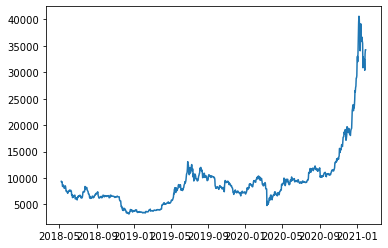

In [36]:
import matplotlib.pyplot as plt

plt.plot(df['close_USD'])
plt.show()

In [37]:
# Split the data
train = df.iloc[:-200] 
test = df.iloc[-200:]

Let’s use statsmodels to create a forecast model. The statsmodel provides many time series model APIs, but we would use the ARIMA model as our example.

In [41]:
from statsmodels.tsa.arima.model import ARIMA


#sample parameters
model = ARIMA(train.close_USD, order=(2, 1, 0)) 
results = model.fit()

# Make predictions for the test set
forecast = results.forecast(steps=200)
forecast

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-07-15    9252.006931
2020-07-16    9252.942627
2020-07-17    9252.688291
2020-07-18    9252.752780
2020-07-19    9252.735700
                 ...     
2021-01-26    9252.739185
2021-01-27    9252.739185
2021-01-28    9252.739185
2021-01-29    9252.739185
2021-01-30    9252.739185
Freq: D, Name: predicted_mean, Length: 200, dtype: float64

In our example above, we use the ARIMA model from statsmodels as the forecasting model and try to predict the next 200 days.

Is the model result good? Let’s try to evaluate them. The time series model evaluation usually uses a visualization graph to compare the actual and prediction with regression metrics such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), and MAPE (Mean Absolute Percentage Error).

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#mean absolute error
mae = mean_absolute_error(test.close_USD, forecast)

#root mean square error
mse = mean_squared_error(test.close_USD, forecast)
rmse = np.sqrt(mse)


print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



MAE: 7956.23
RMSE: 11705.11


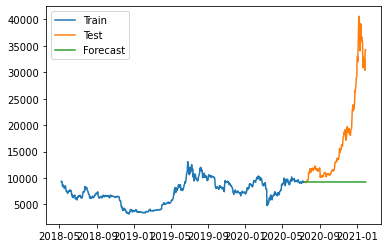

In [48]:
plt.plot(train.close_USD.index, train.close_USD, label='Train')
plt.plot(test.close_USD.index, test.close_USD, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

As we can see, the forecast was worse as our model can’t forecast the increasing trend. The model ARIMA that we use seems too simple for forecasting.

Maybe it’s better if we try using another model outside of statsmodels. Let’s try out the famous prophet package from Facebook.

# Time Series Forecasting with Prophet

In [13]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [18]:
df_p = df.reset_index()[["Time", "close_USD"]].rename(
    columns={"Time": "ds", "close_USD": "y"}
)
df_p

,ds,y
0,2018-05-07,9365.00
1,2018-05-08,9187.56
2,2018-05-09,9310.00
3,2018-05-10,9002.20
4,2018-05-11,8400.00
...,...,...
995,2021-01-26,32467.77
996,2021-01-27,30366.15
997,2021-01-28,33364.86
998,2021-01-29,34252.20


In [15]:
import pandas as pd
from prophet import Prophet

model = Prophet()

# Fit the model
model.fit(df_p)

# create date to predict
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
predictions = model.predict(future_dates)

predictions.head()

11:44:48 - cmdstanpy - INFO - Chain [1] start processing
11:44:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-07,3044.153103,6204.515178,8712.116207,3044.153103,3044.153103,4322.177276,4322.177276,4322.177276,9.010077,9.010077,9.010077,4313.167199,4313.167199,4313.167199,0.0,0.0,0.0,7366.330379
1,2018-05-08,3059.865922,6020.835820,8768.695989,3059.865922,3059.865922,4366.870549,4366.870549,4366.870549,-18.353586,-18.353586,-18.353586,4385.224135,4385.224135,4385.224135,0.0,0.0,0.0,7426.736471
2,2018-05-09,3075.578741,6233.454598,8829.172456,3075.578741,3075.578741,4475.859626,4475.859626,4475.859626,24.394865,24.394865,24.394865,4451.464762,4451.464762,4451.464762,0.0,0.0,0.0,7551.438367
3,2018-05-10,3091.291560,6345.258161,8979.636570,3091.291560,3091.291560,4499.867450,4499.867450,4499.867450,-11.090470,-11.090470,-11.090470,4510.957920,4510.957920,4510.957920,0.0,0.0,0.0,7591.159010
4,2018-05-11,3107.004379,6383.121072,8978.935520,3107.004379,3107.004379,4568.339061,4568.339061,4568.339061,5.454959,5.454959,5.454959,4562.884102,4562.884102,4562.884102,0.0,0.0,0.0,7675.343440


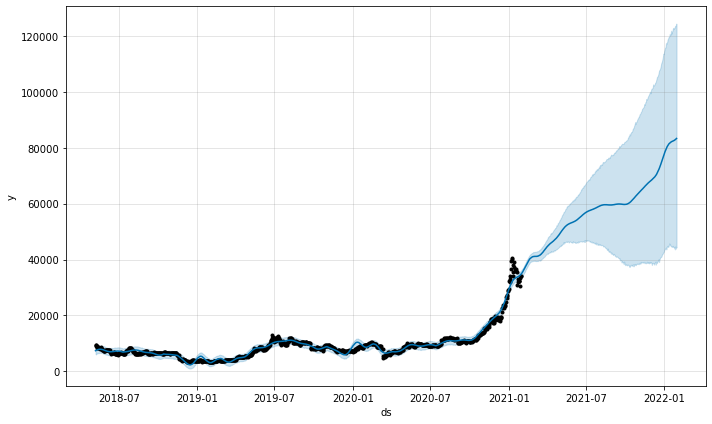

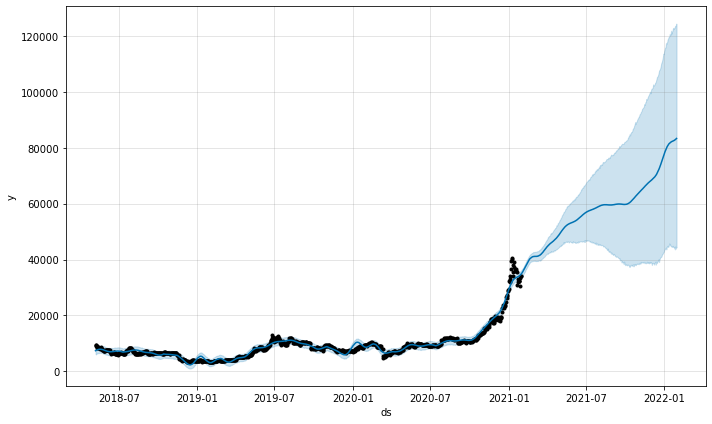

In [16]:
model.plot(predictions)

The predictions plot function from the model would provide us with how confident the predictions were. From the above plot, we can see that the prediction has an upward trend but with increased uncertainty the longer the predictions are.

It is also possible to examine the forecast components with the following function.

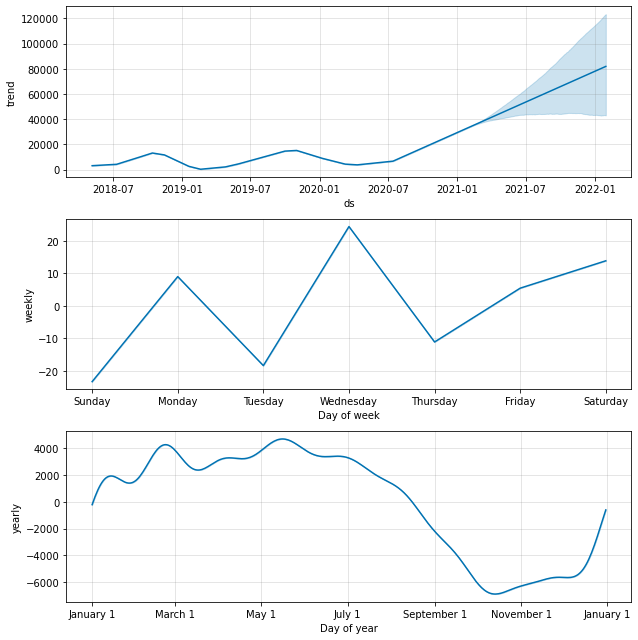

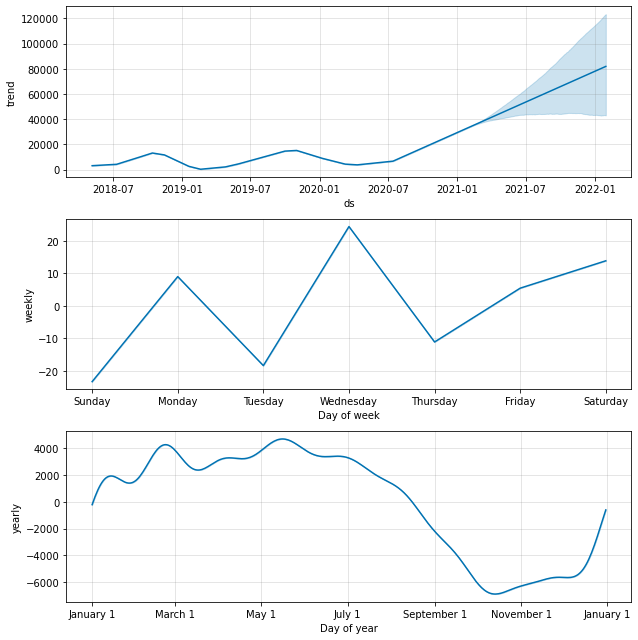

In [17]:
model.plot_components(predictions)

In [19]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.

df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/2 [00:00<?, ?it/s]

11:59:03 - cmdstanpy - INFO - Chain [1] start processing
11:59:03 - cmdstanpy - INFO - Chain [1] done processing
11:59:04 - cmdstanpy - INFO - Chain [1] start processing
11:59:04 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,8.458177e+05,919.683466,728.994758,0.072722,0.068465,0.075976,0.493151
1,38 days,8.422144e+05,917.722421,722.358828,0.072684,0.065857,0.075598,0.506849
2,39 days,8.359480e+05,914.301900,713.844350,0.072501,0.064378,0.075071,0.520548
3,40 days,8.181907e+05,904.538956,700.261172,0.071883,0.062168,0.074090,0.534247
4,41 days,1.037586e+06,1018.619412,726.236124,0.081302,0.061875,0.079324,0.547945
...,...,...,...,...,...,...,...,...
324,361 days,1.352643e+08,11630.317293,9924.559059,0.485226,0.506665,0.499036,0.520548
325,362 days,1.366311e+08,11688.932063,9984.056750,0.483795,0.506665,0.499401,0.513699
326,363 days,1.390733e+08,11792.932459,10073.780879,0.482064,0.506665,0.500144,0.506849
327,364 days,1.419200e+08,11913.019410,10182.260416,0.481148,0.503440,0.501778,0.500000


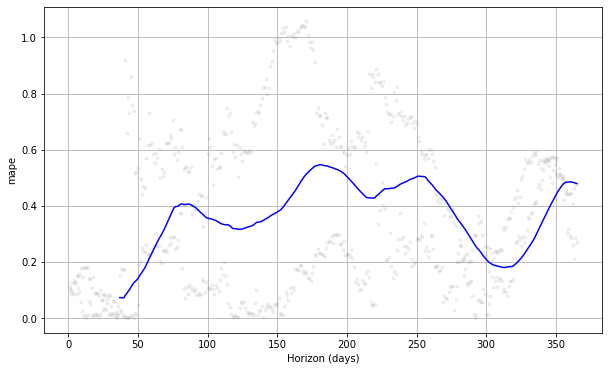

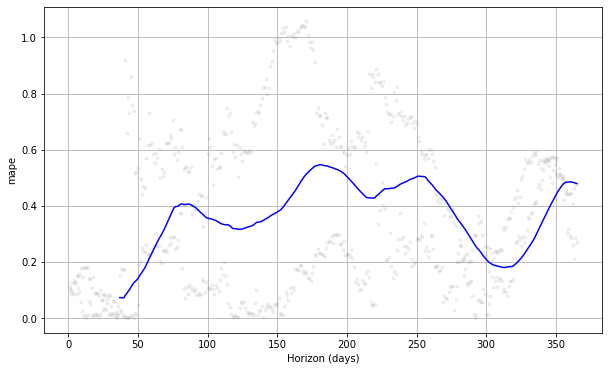

In [20]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mape')

# Conclusion
 

Forecasting is one of the common cases that occur in the business. One easy way to develop a forecasting model is using the statsforecast and Prophet Python packages. In this article, we learn how to create a forecast model and evaluate them with statsforecast and Prophet.